# 4. Capstone Project - Preparing for modeling

#### Loading data and libralies

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [35]:
# Original data set
original_df = pd.read_csv("./capstone_clean_heart_disease_fe.csv")

# Train set : Under sampled data set and Over sampled data set
under_sampled_df = pd.read_csv("./under_sampled_df_fe.csv")
over_sampled_df = pd.read_csv("./over_sampled_df_fe.csv")
# Test set : Under sampled data set and Over sampled data set
test_sampled_df = pd.read_csv("./test_sampled_df_fe.csv")
               
# Train set : SMOTE data set         
smote_df = pd.read_csv("./smote_df.csv")
# Test set : SMOTE data set  
test_smote_df = pd.read_csv("./test_smote_df.csv")

Split each dataset into train set and test set

In [36]:
# Split the original data set into train and test set
X = original_df.drop(columns="HeartDisease")
y = original_df["HeartDisease"]

from sklearn.model_selection import train_test_split

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, test_size = 0.3, random_state=42)

In [37]:
# Split other data set into X and y
X_train_under = under_sampled_df.drop(columns="HeartDisease")
y_train_under = under_sampled_df["HeartDisease"]

X_train_over = over_sampled_df.drop(columns="HeartDisease")
y_train_over = over_sampled_df["HeartDisease"]

X_test_sampled = test_sampled_df.drop(columns="HeartDisease")
y_test_sampled = test_sampled_df["HeartDisease"]

X_train_smote = smote_df.drop(columns="HeartDisease")
y_train_smote = smote_df["HeartDisease"]

X_test_smote = test_smote_df.drop(columns="HeartDisease")
y_test_smote = test_smote_df["HeartDisease"]

In [38]:
X_train = [X_train_original, X_train_under, X_train_over, X_train_smote]
X_test = [X_test_original, X_test_sampled, X_test_sampled, X_test_smote]
y_train = [y_train_original, y_train_under, y_train_over,y_train_smote]
y_test = [y_test_original, y_test_sampled, y_test_sampled, y_test_smote]

train_score = []
test_score = []

for index in range(4):
    
    scaler = StandardScaler()
    scaler.fit(X_train[index])
    X_scaled_train = scaler.transform(X_train[index])
    X_scaled_test = scaler.transform(X_test[index])
    
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_scaled_train,y_train[index])
    
    train_score.append(model.score(X_scaled_train,y_train[index])*100)
    test_score.append(model.score(X_scaled_test,y_test[index])*100)

In [39]:
before_selection = pd.DataFrame((train_score, test_score), columns=["Original", "Under Sampled", "Over Sampled", "SMOTE"], 
                                index=["Train score", "Test score"])
before_selection

,Original,Under Sampled,Over Sampled,SMOTE
Train score,91.452915,75.787020,75.675365,80.968618
Test score,91.389649,73.322747,73.284094,77.891185


**Festure selection: RFE**  
The columns that I'll use for modeling

In [40]:
# RFE : Original data final

from sklearn.feature_selection import RFE

scaler = StandardScaler()
scaler.fit(X_train_original)
X_scaled_train = scaler.transform(X_train_original)
X_scaled_test = scaler.transform(X_test_original)

rfe_original = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=7)
rfe_original.fit(X_scaled_train,y_train_original)
    
train_score_or_rfe = rfe_original.score(X_scaled_train,y_train_original)
test_score_or_rfe = rfe_original.score(X_scaled_test,y_test_original)

In [41]:
X_train_original.loc[:, rfe_original.support_]

,BMI,Smoking,DiffWalking,Sex,AgeCategory,GenHealth,Asthma
176993,27.12,1,0,1,35,3,0
267593,30.23,0,0,0,18,2,0
175707,32.55,0,0,1,60,3,0
317039,33.07,0,0,0,55,3,0
262926,23.06,0,0,1,30,4,0
...,...,...,...,...,...,...,...
119879,26.62,0,0,0,40,4,0
259178,25.04,0,0,1,25,4,0
131932,36.05,0,0,0,18,1,0
146867,27.44,0,0,0,40,3,0


In [42]:
# RFE : Under sampled data final

scaler = StandardScaler()
scaler.fit(X_train_under)
X_scaled_train = scaler.transform(X_train_under)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_under = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=9)
rfe_under.fit(X_scaled_train,y_train_under)
    
train_score_u_rfe = rfe_under.score(X_scaled_train,y_train_under)
test_score_u_rfe = rfe_under.score(X_scaled_test,y_test_sampled)

In [43]:
X_train_under.loc[:, rfe_under.support_]

,Smoking,AlcoholDrinking,PhysicalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,1,0,0.0,0,1,65,1,0,0
1,0,0,5.0,0,0,80,0,0,0
2,0,0,0.0,0,0,40,4,0,0
3,0,0,7.0,1,0,60,2,0,0
4,1,0,0.0,0,1,70,3,0,0
...,...,...,...,...,...,...,...,...,...
38177,0,0,0.0,0,1,75,3,0,0
38178,0,0,30.0,1,0,50,0,0,0
38179,0,0,0.0,0,0,75,2,0,0
38180,1,0,15.0,0,1,70,3,0,0


In [44]:
# RFE : Over sampled data final

scaler = StandardScaler()
scaler.fit(X_train_over)
X_scaled_train = scaler.transform(X_train_over)
X_scaled_test = scaler.transform(X_test_sampled)
   
rfe_over = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=11)
rfe_over.fit(X_scaled_train,y_train_over)
    
train_score_ov_rfe = rfe_over.score(X_scaled_train,y_train_over)
test_score_ov_rfe = rfe_over.score(X_scaled_test,y_test_sampled)

In [45]:
X_train_over.loc[:, rfe_over.support_]

,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,GenHealth,Asthma,Race_Asian
0,27.12,1,0,0.0,2.0,0,1,35,3,0,0
1,30.23,0,0,0.0,0.0,0,0,18,2,0,0
2,32.55,0,0,0.0,0.0,0,1,60,3,0,0
3,33.07,0,0,0.0,0.0,0,0,55,3,0,0
4,23.06,0,0,0.0,0.0,0,1,30,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408515,42.87,0,0,30.0,0.0,1,0,60,2,0,0
408516,24.41,0,0,0.0,0.0,0,1,65,2,0,0
408517,33.00,0,0,0.0,0.0,0,1,60,1,0,0
408518,31.32,1,0,3.0,2.0,0,0,65,2,1,0


In [46]:
# RFE : SMOTE data final

scaler = StandardScaler()
scaler.fit(X_train_smote)
X_scaled_train = scaler.transform(X_train_smote)
X_scaled_test = scaler.transform(X_test_smote)
    
rfe_smote = RFE(estimator=LogisticRegression(max_iter=1500, random_state=42), n_features_to_select=10)
rfe_smote.fit(X_scaled_train,y_train_smote)
    
train_score_s_rfe = rfe_smote.score(X_scaled_train,y_train_smote)
test_score_s_rfe = rfe_smote.score(X_scaled_test,y_test_smote)

In [47]:
X_train_smote.loc[:, rfe_smote.support_]

,AlcoholDrinking,AgeCategory,GenHealth,Asthma,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,35,3,0,0,0,0,0,0,1
1,0,18,2,0,0,0,0,1,0,0
2,0,60,3,0,0,0,0,0,0,1
3,0,55,3,0,0,0,0,1,0,0
4,0,30,4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
408515,0,80,1,0,0,0,0,0,0,1
408516,0,65,3,0,0,0,0,0,0,1
408517,0,70,2,0,0,0,0,0,0,0
408518,0,75,2,0,0,0,0,0,0,1


## Optimizing Hyperparameters

The target value of the dataset is categorical. Therefore, I'll use "Logistic regression", "Naive Bayes", "Decision Trees", "Random Forest", "SVM", and "Neural Networks" for modeling for my project. Before creating models, I'll optimize each methods' hyperparameters. For doing that, I'll split train set into train_v set and validation set first.

In [48]:
# Split the train set into train_v and validation

X_train_v_original, X_validation_original, y_train_v_original, y_validation_original = \
                train_test_split(X_train_original.loc[:, rfe_original.support_], y_train_original, test_size = 0.3, random_state=42)

X_train_v_under, X_validation_under, y_train_v_under, y_validation_under = \
                train_test_split(X_train_under.loc[:, rfe_under.support_], y_train_under, test_size = 0.3, random_state=42)

X_train_v_over, X_validation_over, y_train_v_over, y_validation_over = \
                train_test_split(X_train_over.loc[:, rfe_over.support_], y_train_over, test_size = 0.3, random_state=42)

X_train_v_smote, X_validation_smote, y_train_v_smote, y_validation_smote = \
                train_test_split(X_train_smote.loc[:, rfe_smote.support_], y_train_smote, test_size = 0.3, random_state=42)

### Optimizing Hyperparameters: Logistic Regression

I'll create def functions to see which c values I should for pipeline with logistic regression.

In [26]:
# create a plot with log scaled
def logistit_C_log(c_range, X_train_v, y_train_v, X_validation, y_validation):
    
    validation_scores = []
    train_v_scores = []
    
    scaler = StandardScaler()
    scaler.fit(X_train_v)
    X_scaled_train = scaler.transform(X_train_v)
    X_scaled_test = scaler.transform(X_validation)
    
    for c in c_range:
        my_logreg = LogisticRegression(C = c, max_iter=1000, random_state=42)
        my_logreg.fit(X_scaled_train, y_train_v)
        
        # train on traning set
        train_v_scores.append(my_logreg.score(X_scaled_train, y_train_v))
        # score on validation set
        validation_scores.append(my_logreg.score(X_scaled_test, y_validation))
        
    plt.figure()
    plt.plot(c_range, train_v_scores, label="Train Score",marker='.')
    plt.plot(c_range, validation_scores,label="Test Score",marker='.')
    plt.xscale('log')
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show();

#### Original data

Original data: train_v and validation


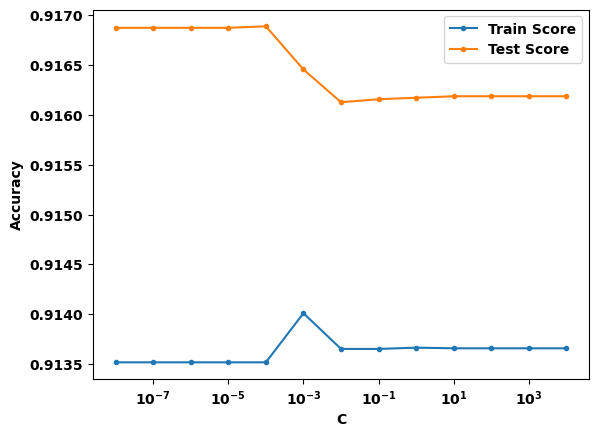

In [17]:
print("Original data: train_v and validation")
c_range = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001,\
                    0.01, 0.1, 1, 10, 100, 1000, 10000])
logistit_C_log(c_range, X_train_v_original, y_train_v_original, X_validation_original, y_validation_original)

The train score with c=0.001 was the highest. Now I'll check the accuracy score for train set and test set using C values with 0.001 and around.

Original data: train and test


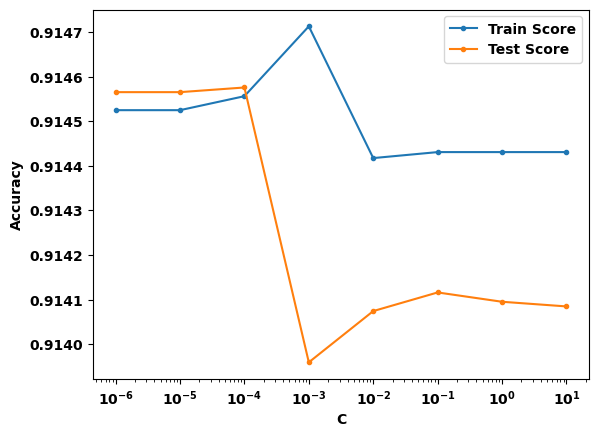

In [18]:
print("Original data: train and test")
c_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10])
logistit_C_log(c_range, X_train_original.loc[:, rfe_original.support_], y_train_original, X_test_original.loc[:, rfe_original.support_], y_test_original)

The test score of the train_v and validation set with c=0.001 was the highest, but the test score for train and test set with c=0.001 dropped rapidly. Additionally, the test scores are greater than the train scores when C value is 0.0001 and smaller. The accuracy scores of train_v and validation set with c=0.0001 and smaller also has bigger gap (the test score is greater than train score), so the model could be underfitting with that small c lavues. The accuracy scores with c=0.01 and greater looks nicer, and the test score with c=0.1 is the highest and closest to the train score among that area. Therefore, I'll use c=0.1 and 1 for pipeline.

In [22]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None],
             'model__C': [0.1, 1],
             'model__penalty': ['l1', 'l2', 'elasticnet', None],
             'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_original = grid.fit(X_train_original.loc[:, rfe_original.support_], y_train_original)

fittedgrid_log_original.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None wil

CPU times: total: 2min 7s
Wall time: 2min 42s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'model__C': 0.1,
 'model__penalty': 'l2',
 'model__solver': 'newton-cholesky',
 'normalise': StandardScaler()}

In [23]:
fittedgrid_log_original.score(X_test_original.loc[:, rfe_original.support_], y_test_original)

0.914126324147009

The accuracy score of original test set was **91.389649**, so the score is improved.

#### Under sanpled data

Under sampled data: train_v and validation


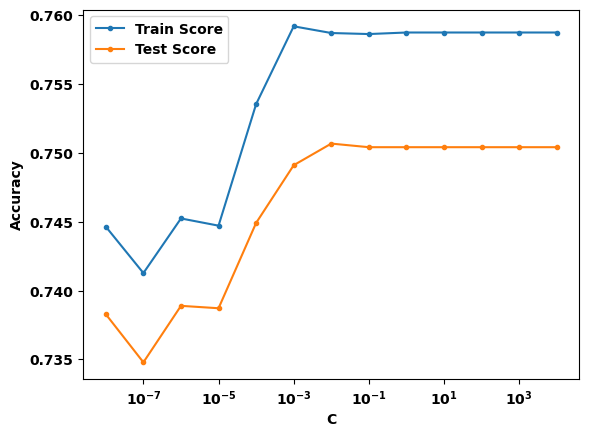

In [17]:
print("Under sampled data: train_v and validation")
c_range = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001,\
                    0.01, 0.1, 1, 10, 100, 1000, 10000])
logistit_C_log(c_range, X_train_v_under, y_train_v_under, X_validation_under, y_validation_under)

The both train and test score increased when c value is 0.001, and the test score is the highest and closest to train score when c=0.01. So, I'll check the accuracy score for train and test set with c=0.01 and around.

Under sampled data: train and test


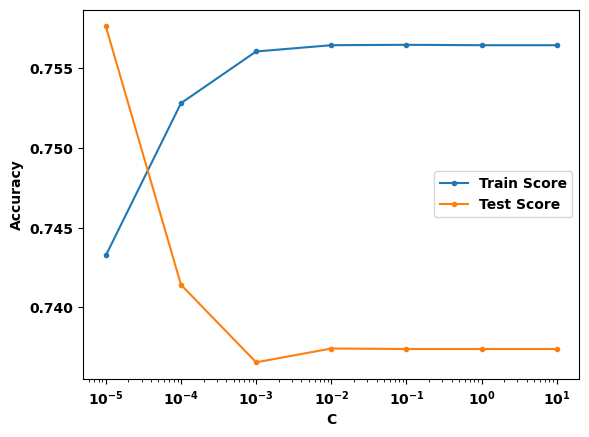

In [20]:
print("Under sampled data: train and test")
c_range = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10])
logistit_C_log(c_range, X_train_under.loc[:, rfe_under.support_], y_train_under, X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

We can see the model is underfitting when C value is 0.00001, then the test score decreased when C value is greater than 0.00001. However, it gets increased and closer to the train score when C value is 0.01. The train score increased until C value is 0.001, then train scores stay flat. Therefore, I'll use C=0.01 for Under sampled data modeling. Also, the both scores are closest and the model is not underfitting when C value is 0.0001, so I'll use the c value for the pipeline too.

It tooks too long to execute the same code as Original data. Therefore, I'll split the pipeline into 2 steps. First, I'll check the best value for 'dim_reducer', then I'll use the value which pipeline chose and check the best values for 'model__C', 'model__penalty', and 'model__solver'.

In [21]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_log_under.best_params_

CPU times: total: 18h 44s
Wall time: 3h 31min 1s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'normalise': StandardScaler()}

In [64]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA()],
             'model__C': [0.0001, 0.01],
             'model__penalty': ['l1', 'l2', 'elasticnet', None],
             'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_under = grid.fit(X_train_under.loc[:, rfe_under.support_], y_train_under)

fittedgrid_log_under.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None wil

CPU times: total: 5.84 s
Wall time: 12.6 s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'model__solver': 'liblinear',
 'normalise': StandardScaler()}

In [65]:
fittedgrid_log_under.score(X_test_sampled.loc[:, rfe_under.support_], y_test_sampled)

0.7352019389482042

The accuracy score of Under sampled test set was **73.322747**, so the score is improved.

#### Over sampled data

Over sampled data: train_v and validation


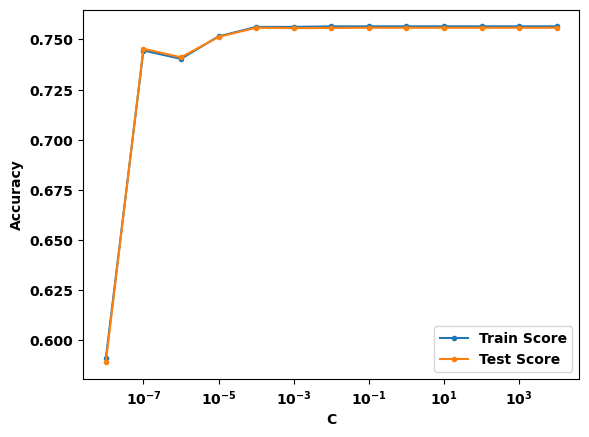

In [19]:
print("Over sampled data: train_v and validation")
c_range = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001,\
                    0.01, 0.1, 1, 10, 100, 1000, 10000])
logistit_C_log(c_range, X_train_v_over, y_train_v_over, X_validation_over, y_validation_over)

The both scores of train_v and validation get increased when C value is 0.0000001, and the scores are the highest when C value is 0.0001. Therefore, So, I'll check the accuracy score for train and test set with c=0.0001 and around.

Over sampled data: train and test


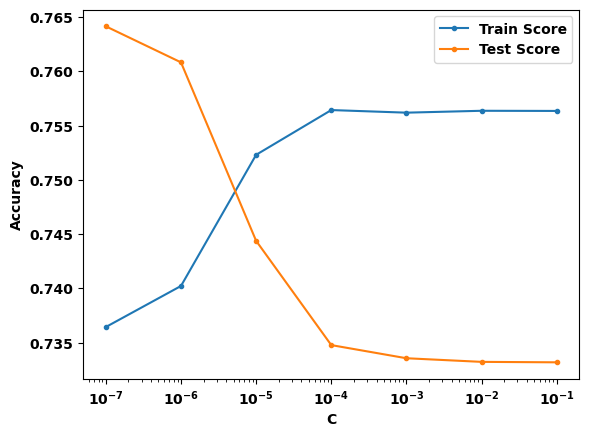

In [20]:
print("Over sampled data: train and test")
c_range = np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])
logistit_C_log(c_range, X_train_over.loc[:, rfe_over.support_], y_train_over, X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

We can see the model is underfittin when C value is lower than 0.000001, then the both scores are closest when C value is 0.00001 but not underfitting. The both scores almost stay flat when C value is greater than 0.0001. Thefore, I'll use c=0.00001 and 0.0001 for the pipeline.

Over sampled data has more rows than Original data and Under samled data have. I'll use 11 columns which REF chose, so it is expected that the execution time of pipeline is going to be very long. Thefore, I'll split the pipeline into 2 steps for the pipeline. First, I'll check the best value for 'dim_reducer', then I'll use the value which pipeline chose and check the best values for 'model__C', 'model__penalty', and 'model__solver'.

In [25]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_log_over.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_

CPU times: total: 2.42 s
Wall time: 4.64 s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'normalise': StandardScaler()}

In [33]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None],
             'model__C': [0.00001, 0.0001],
             'model__penalty': ['l1', 'l2', 'elasticnet', None],
             'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_over = grid.fit(X_train_over.loc[:, rfe_over.support_], y_train_over)

fittedgrid_log_over.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None

CPU times: total: 4min 24s
Wall time: 5min 45s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'model__C': 0.0001,
 'model__penalty': 'l2',
 'model__solver': 'liblinear',
 'normalise': StandardScaler()}

In [28]:
fittedgrid_log_over.score(X_test_sampled.loc[:, rfe_over.support_], y_test_sampled)

0.7328200413698001

The accuracy score of Under sampled test set was **73.284094**, so the score is improved.

#### SMOTE data

SMOTE data: train_v and validation


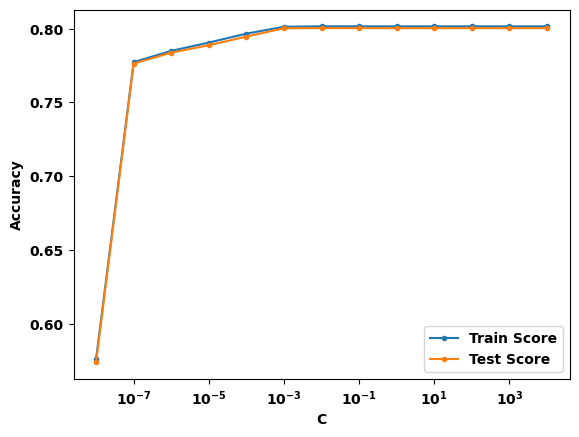

In [21]:
print("SMOTE data: train_v and validation")
c_range = np.array([0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001,\
                    0.01, 0.1, 1, 10, 100, 1000, 10000])
logistit_C_log(c_range, X_train_v_smote, y_train_v_smote, X_validation_smote, y_validation_smote)

The both scores of train_v and validation get increased when C value is 0.0000001, then the scores are the highest when C value is 0.001. Therefore, I'll check the accuracy score for train and test set with c=0.001 and around.

SMOTE data: train and test


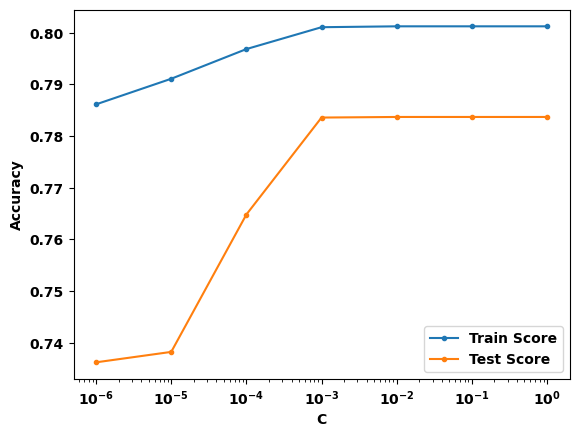

In [22]:
print("SMOTE data: train and test")
c_range = np.array([0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1])
logistit_C_log(c_range, X_train_smote.loc[:, rfe_smote.support_], y_train_smote, X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

The test score gets increased rapidly when C value is 0.001. Also, the train score is the highest when C value is 0.001. Therefore, I'll use c=0.001 and 0.01 for the pipeline.

SMOTE data also has more rows than Original data and Under samled data have. I'll use 10 columns which REF chose, so it is expected that the execution time of pipeline is going to be very long, too. Thefore, I'll split the pipeline into 2 steps for the pipeline. First, I'll check the best value for 'dim_reducer', then I'll use the value which pipeline chose and check the best values for 'model__C', 'model__penalty', and 'model__solver'.

In [30]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA(), KernelPCA(), None]}
       #      'model__C': [0.001, 0.01]}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_smote = grid.fit(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)

fittedgrid_log_smote.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_

{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'normalise': StandardScaler()}

In [20]:
%%time
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import GridSearchCV

estimators = [('normalise', StandardScaler()),
              ('dim_reducer', PCA()),
              ('model', LogisticRegression(max_iter=1000))]

pipe = Pipeline(estimators)

param_grid = [
            {'model': [LogisticRegression(max_iter=1000)], 
             'normalise': [StandardScaler()],
             'dim_reducer': [PCA()],
             'model__C': [0.001, 0.01],
             'model__penalty': ['l1', 'l2', 'elasticnet', None],
             'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky','sag', 'saga']}
]

grid = GridSearchCV(pipe, param_grid, cv=5)
fittedgrid_log_smote = grid.fit(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)

fittedgrid_log_smote.best_params_

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None wil

CPU times: total: 14min 12s
Wall time: 15min 7s


{'dim_reducer': PCA(),
 'model': LogisticRegression(max_iter=1000),
 'model__C': 0.001,
 'model__penalty': None,
 'model__solver': 'lbfgs',
 'normalise': StandardScaler()}

In [21]:
fittedgrid_log_smote.score(X_test_smote.loc[:, rfe_smote.support_], y_test_smote)

0.7836756440525688

The accuracy score of Under sampled test set was **77.891185**, so the score is improved.

### Model Evaluation: Logistic Regression

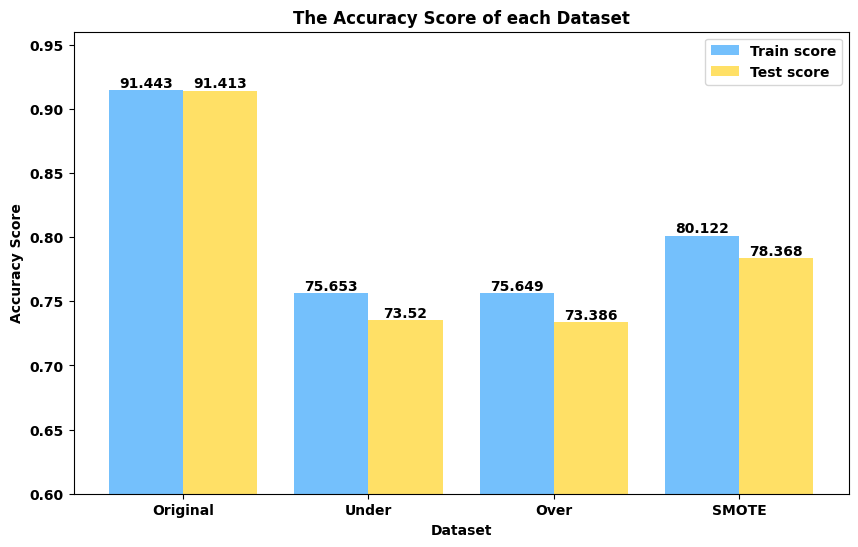

In [66]:
train = [fittedgrid_log_original.score(X_train_original.loc[:, rfe_original.support_], y_train_original),\
        fittedgrid_log_under.score(X_train_under.loc[:, rfe_under.support_], y_train_under),\
        fittedgrid_log_over.score(X_train_over.loc[:, rfe_over.support_], y_train_over),\
        fittedgrid_log_smote.score(X_train_smote.loc[:, rfe_smote.support_], y_train_smote)]
test = [fittedgrid_log_original.score(X_test_original.loc[:, rfe_original.support_], y_test_original),\
       fittedgrid_log_under.score(X_test_sampled.loc[:, rfe_under.support_], y_test_sampled),\
       fittedgrid_log_over.score(X_test_sampled.loc[:, rfe_over.support_], y_test_sampled),\
       fittedgrid_log_smote.score(X_test_smote.loc[:, rfe_smote.support_], y_test_smote)]

x_labels = np.arange(len(train))
labels = ["Original","Under", "Over", "SMOTE"]

width = 0.4

plt.figure(figsize=(10,6))

plt.bar(x_labels, train, color="#74C0FC", width=width, align="center", label="Train score")
plt.bar(x_labels+width, test, color="#FFE066", width=width, align="center", label="Test score")

# Put the values of train score in the chart
for x, y in zip(x_labels, train):
    plt.text(x, y, round(y*100, 3), ha='center', va='bottom')

# Put the values of test score in the chart
for x, y in zip(x_labels, test):
    plt.text(x+width, y, round(y*100, 3), ha='center', va='bottom')

plt.xticks(x_labels+width/2, labels)
plt.ylim(bottom=0.6)
plt.legend()
plt.title("The Accuracy Score of each Dataset")
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.show()

**Otiginal Dataset**

In [53]:
# Create a logistic regression model with original dataset
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X_train_original.loc[:, rfe_original.support_])
X_scaled_train = scaler.transform(X_train_original.loc[:, rfe_original.support_])
X_scaled_test = scaler.transform(X_test_original.loc[:, rfe_original.support_])
    
from sklearn.decomposition import PCA
# Instantiate and fit
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

# Transform train and test
X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

model_original = LogisticRegression(max_iter=1000, C=0.1, penalty="l2", solver="newton-cholesky", random_state=42)
model_original.fit(X_train_PCA,y_train_original)

train_score = model_original.score(X_train_PCA, y_train_original)
test_score = model_original.score(X_test_PCA, y_test_original)

# Evaluation(precision & Recall)
from sklearn.metrics import classification_report

y_pred = model_original.predict(X_test_PCA)

report_initial = classification_report(y_test_original, y_pred)

print("Original data")
print(f"Train score: {train_score}\nTest score: {test_score}\n\n{report_initial}")

Original data
Train score: 0.9144261722580154
Test score: 0.914126324147009

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     87544
           1       0.48      0.07      0.12      8178

    accuracy                           0.91     95722
   macro avg       0.70      0.53      0.54     95722
weighted avg       0.88      0.91      0.88     95722



The accuracy scores improved. However, the recall score of 1 is 0.07 which means only 7% of the person who have heart disease was predicted correctly. This is probably becouse this dataset is imbalanced data, so the model is overfitting. I need a model which has good f1 score for 1, so this model cannot be my final model.

**Under sampled dataset**

In [54]:
scaler = StandardScaler()
scaler.fit(X_train_under.loc[:, rfe_under.support_])
X_scaled_train = scaler.transform(X_train_under.loc[:, rfe_under.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_under.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)
    
model_under = LogisticRegression(max_iter=1000, C=0.01, penalty="l1", solver="liblinear", random_state=42)
model_under.fit(X_train_PCA,y_train_under)

train_score = model_under.score(X_train_PCA, y_train_under)
test_score = model_under.score(X_test_PCA, y_test_sampled)

# Evaluation(precision & Recall)
from sklearn.metrics import classification_report

y_pred = model_under.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("Under sampled data")
print(f"Train score: {train_score}\nTest score: {test_score}\n\n{report_initial}")

Under sampled data
Train score: 0.756534492692892
Test score: 0.7352019389482042

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.78      0.34      8178

    accuracy                           0.74     95722
   macro avg       0.59      0.76      0.59     95722
weighted avg       0.91      0.74      0.79     95722



**Over sampled dataset**

In [55]:
scaler = StandardScaler()
scaler.fit(X_train_over.loc[:, rfe_over.support_])
X_scaled_train = scaler.transform(X_train_over.loc[:, rfe_over.support_])
X_scaled_test = scaler.transform(X_test_sampled.loc[:, rfe_over.support_])
    
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)
    
model_over = LogisticRegression(max_iter=1000, C=0.0001, penalty="l2", solver="liblinear", random_state=42)
model_over.fit(X_train_PCA,y_train_over)

train_score = model_over.score(X_train_PCA, y_train_over)
test_score = model_over.score(X_test_PCA, y_test_sampled)

# Evaluation(precision & Recall)
from sklearn.metrics import classification_report

y_pred = model_over.predict(X_test_PCA)

report_initial = classification_report(y_test_sampled, y_pred)

print("Over sampled data")
print(f"Train score: {train_score}\nTest score: {test_score}\n\n{report_initial}")

Over sampled data
Train score: 0.756489278370704
Test score: 0.7338647332901528

              precision    recall  f1-score   support

           0       0.97      0.73      0.83     87544
           1       0.21      0.79      0.34      8178

    accuracy                           0.73     95722
   macro avg       0.59      0.76      0.58     95722
weighted avg       0.91      0.73      0.79     95722



The both dataset of under sampled and over sampled got almost the same accuracy scores and evaluation scores. However, over sampled dataset got slightly better recall score for 1 and accuracy score for test set. Also, over sampled dataset got the highest recall score and f1 score for 1. I need a model which can predict true positive correctly more, so I'll keep this model.

**SMOTE dataset**

In [57]:
scaler = StandardScaler()
scaler.fit(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_train = scaler.transform(X_train_smote.loc[:, rfe_smote.support_])
X_scaled_test = scaler.transform(X_test_smote.loc[:, rfe_smote.support_])
   
my_PCA = PCA()
my_PCA.fit(X_scaled_train)

X_train_PCA = my_PCA.transform(X_scaled_train)
X_test_PCA = my_PCA.transform(X_scaled_test)

model_smote = LogisticRegression(max_iter=1000, C=0.001, penalty=None, solver="lbfgs", random_state=42)
model_smote.fit(X_train_PCA,y_train_smote)

train_score = model_smote.score(X_train_PCA, y_train_smote)
test_score = model_smote.score(X_test_PCA, y_test_smote)

# Evaluation(precision & Recall)
from sklearn.metrics import classification_report

y_pred = model_smote.predict(X_test_PCA)

report_initial = classification_report(y_test_smote, y_pred)

print("SMOTE data")
print(f"Train score: {train_score}\nTest score: {test_score}\n\n{report_initial}")

C:\Users\yumem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


SMOTE data
Train score: 0.8012165867032214
Test score: 0.7836756440525688

              precision    recall  f1-score   support

           0       0.96      0.80      0.87     87544
           1       0.22      0.61      0.32      8178

    accuracy                           0.78     95722
   macro avg       0.59      0.70      0.60     95722
weighted avg       0.89      0.78      0.82     95722



The SMOTE dataset got lower recall score for 1 than the over sampled dataset. However, this model got highest accuracy score for test set. Therefore, I'll keep this model for now, too.

**From Logistic Regression: Over Sampled dataset, SMOTE dataset**